# Safest Neighborhood in Pittsburgh based on Police Arrest Data

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Code Below - Reading in the data from the Police-Arrest Data file into a dataframe    
#### and organizing dataframe and organizing it into Neighborhoods and Total Arrests

In [11]:
arrests = pd.read_csv("Pittsburgh-Police-Arrest-Data.csv")

pd.set_option('display.max_rows', None)

# calc total number of arrests in each neighborhood
arrests_in_neighborhoods = arrests.groupby("INCIDENTNEIGHBORHOOD").size() 


d2 = pd.DataFrame( { "number of crimes" : arrests_in_neighborhoods } )

d2.reset_index(inplace=True)

d2.columns = [ "Neighborhood", "Number_of_Arrests"]

print( d2 ) 


                   Neighborhood  Number_of_Arrests
0              Allegheny Center               1227
1                Allegheny West                127
2                     Allentown                930
3                     Arlington                302
4             Arlington Heights                153
5                    Banksville                288
6             Bedford Dwellings                656
7                     Beechview               1167
8                   Beltzhoover                489
9                    Bloomfield                972
10                        Bluff               1463
11                      Bon Air                261
12             Brighton Heights               1095
13                    Brookline               1346
14         California-Kirkbride                304
15                      Carrick               2300
16    Central Business District               4250
17        Central Lawrenceville                425
18           Central North Side

#### Code Below - Merging the data in the Police-Arrest DataSet with the Neighborhoods map folder.

               hood  Number_of_Arrests  \
0   Central Oakland              512.0   
1     North Oakland              434.0   
2      West Oakland              312.0   
3  Crawford-Roberts              809.0   
4    Strip District              492.0   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.95455 40.45882, -79.95427 40.458...  
2  POLYGON ((-79.96230 40.44294, -79.96220 40.442...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.97494 40.45629, -79.97484 40.456...  


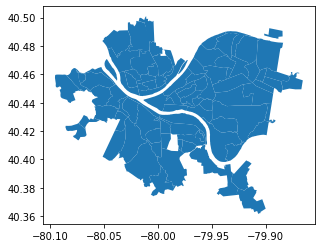

In [12]:


# filter to important info
arrests_in_neighborhoods = arrests.groupby("INCIDENTNEIGHBORHOOD").size()

d2 = pd.DataFrame({"Number_of_Arrests": arrests_in_neighborhoods})
d2.reset_index(inplace=True)
d2.columns = ["Neighborhood", "Number_of_Arrests"]  # Swap column names for consistency

# Assuming 'hood' is the column you're merging on in neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")  # read in the shapefile
neighborhoods['hood'] = neighborhoods['hood'].astype(str)  # Convert to a common data type

neighborhoods.plot()  # plot the geopandas dataframe

# do the merge
arrests_map = neighborhoods.merge(d2, how='left', left_on='hood', right_on='Neighborhood')

# Look at the head to confirm it merged correctly
print(arrests_map[['hood', 'Number_of_Arrests', 'geometry']].head())

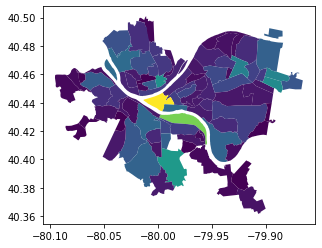

In [9]:
# draw a choropleth map using data from the column named "number_of_steps"
arrests_map.plot(column='Number_of_Arrests')

#### Analysis: 
The following is a map representation of the Total Arrests in each neighborhood. It is very    
good in the fact that it is color coded. Though it makes the neighborhoods very easy to see it is    
difficult to actually determine which neighborhoods have the least amount of arrests due to the shades    
of color being very similar at lower amounts of arrests.

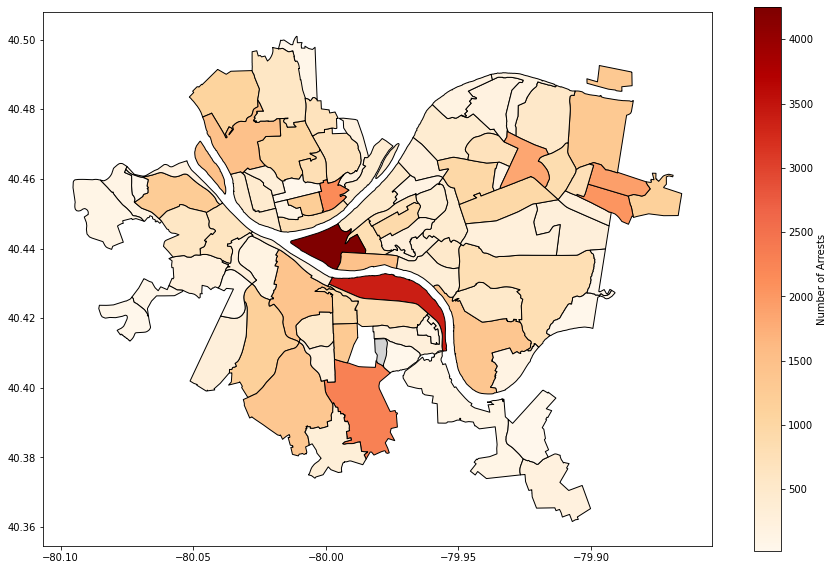

In [6]:
arrests_map.plot(column='Number_of_Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Analysis:
Following is a bar graph of every neighborhood and their Total Arrests. Great for having the neighborhoods ranked for you,  
but not good if you want to know how much arrests each neighborhood has. Better than the map in the way that we can actually know   
which is the safest in terms of Total Arrests.


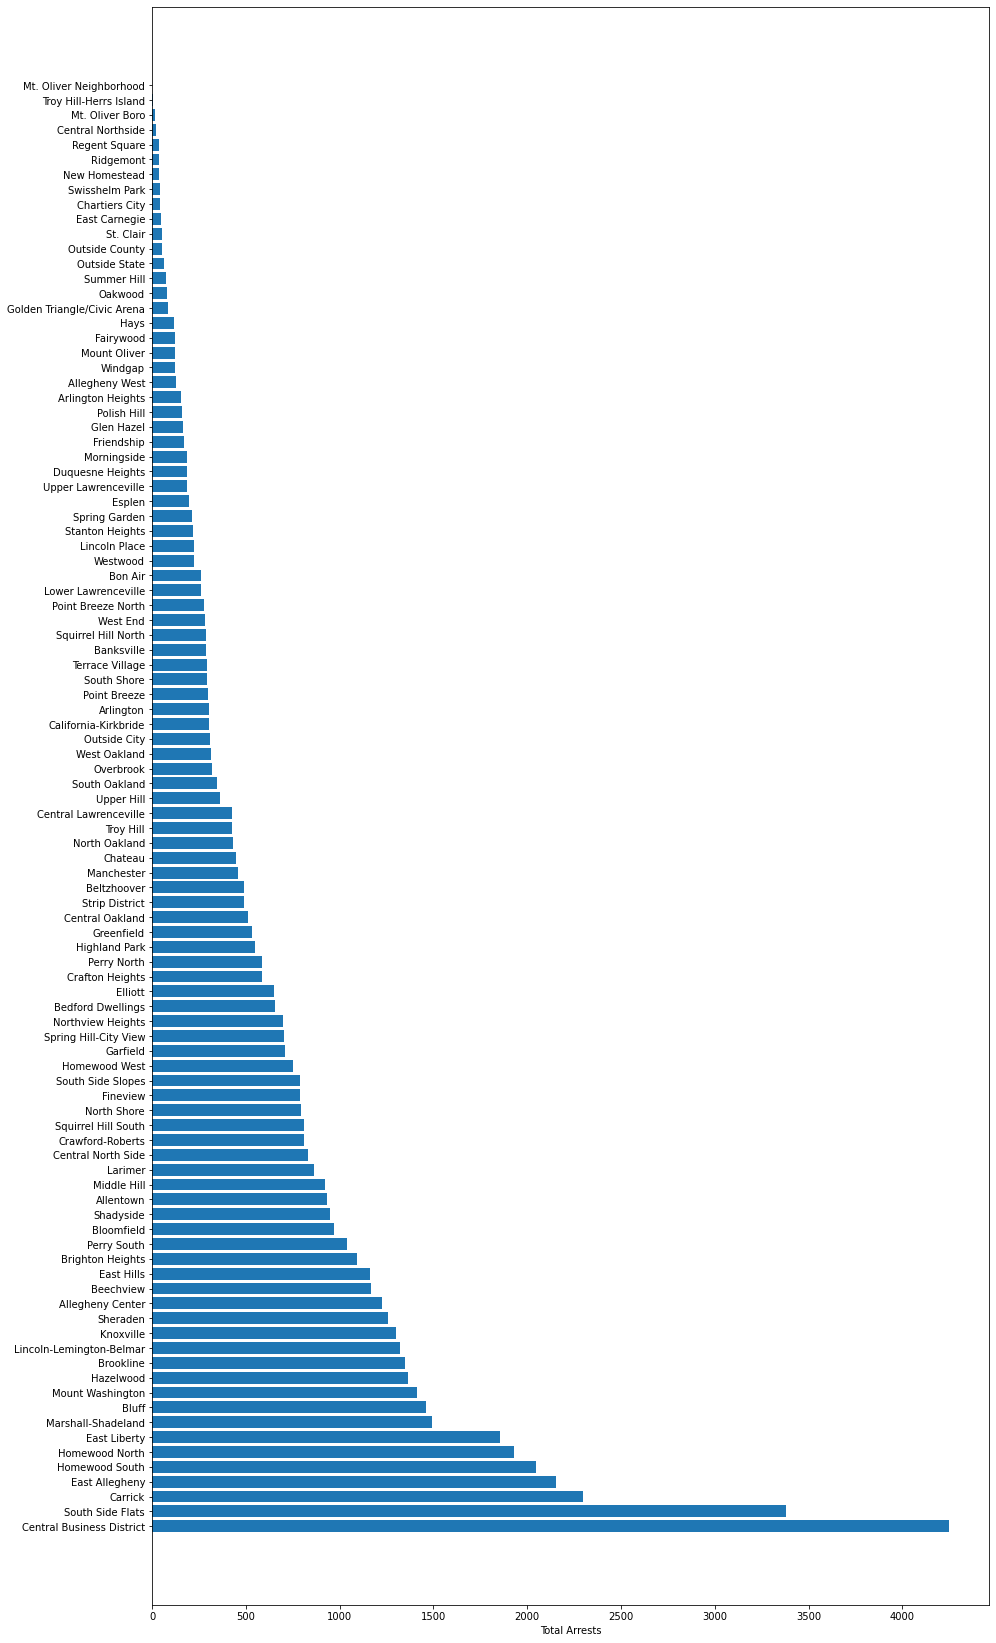

In [10]:

# Convert 'Number_of_Arrests' to numeric
d2['Number_of_Arrests'] = pd.to_numeric(d2['Number_of_Arrests'], errors='coerce')

# Sort the DataFrame by 'Number_of_Arrests' in descending order
d2_sorted = d2.sort_values(by='Number_of_Arrests', ascending=False)

# Plotting the horizontal bar graph using Matplotlib directly
plt.figure(figsize=(15, d2_sorted.shape[0] * 0.3))
plt.barh(d2_sorted['Neighborhood'], d2_sorted['Number_of_Arrests'])
plt.xlabel("Total Arrests")
plt.show()

#### Analysis : 
The Following shows a zoomed in version of the above bar graph with a focus on the least Total Arrest neighborhoods. It's clear that 
Mt. Oliver Nighborhood is the neighborhood with the least amount of total arrests. (2 Arrests.)

Text(0.5, 0, 'Total Arrests')

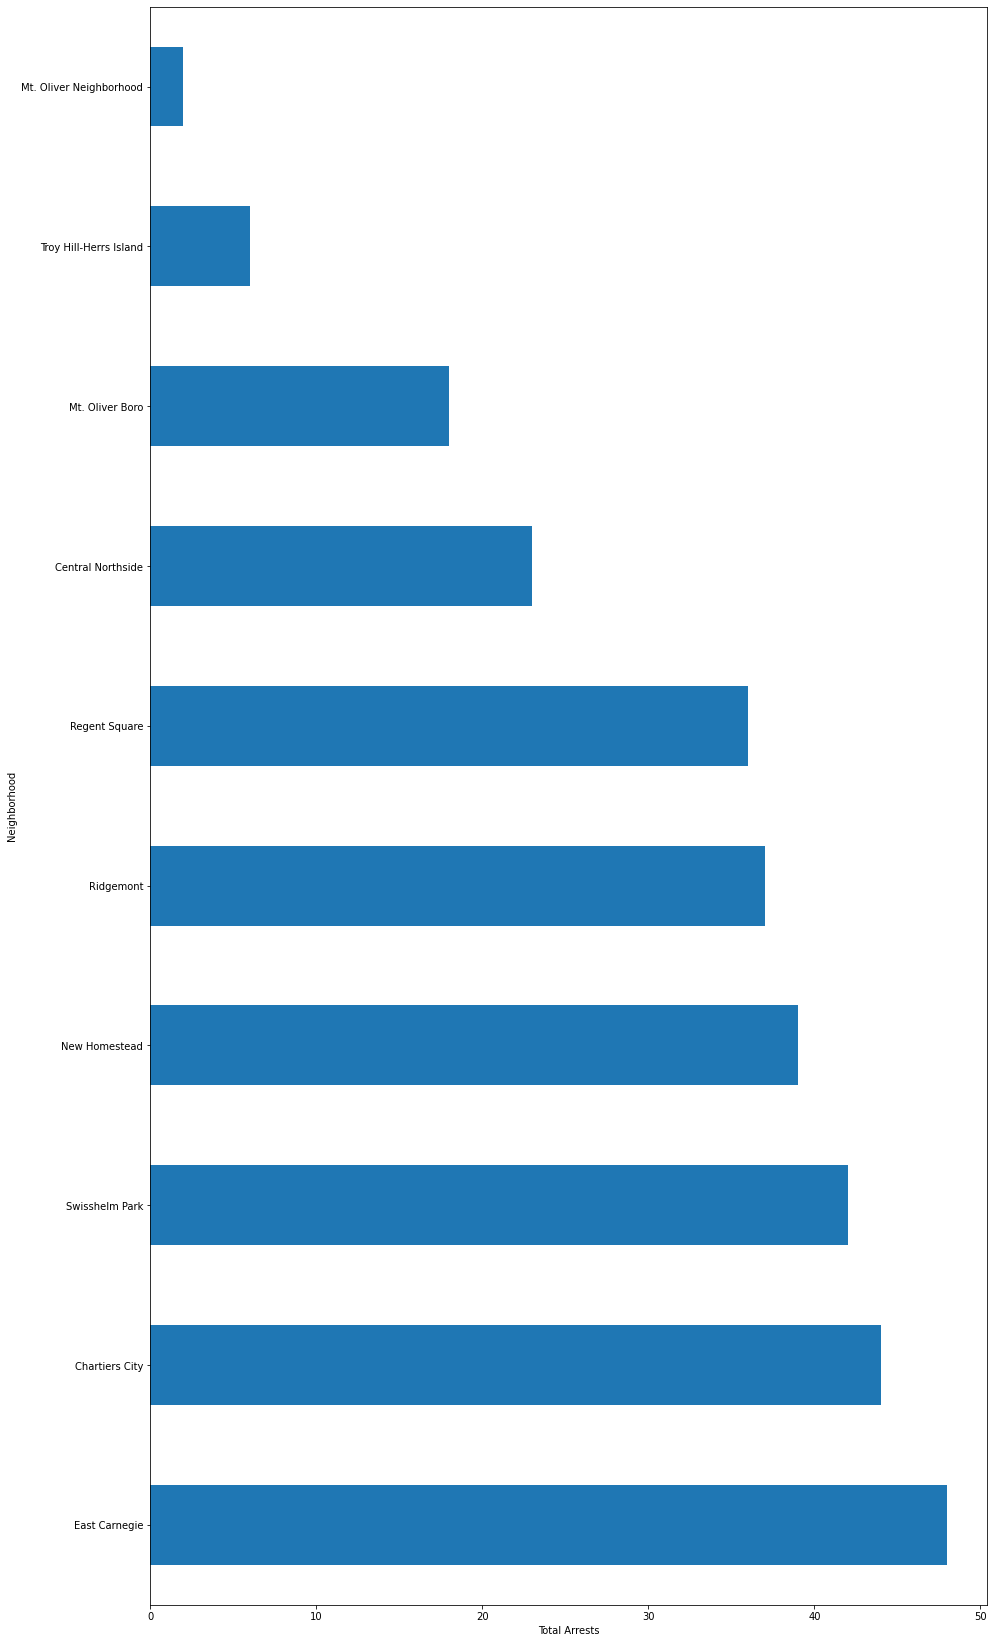

In [8]:
d2_sorted = d2.sort_values(by='Number_of_Arrests', ascending=False )
graph = d2_sorted[88:].plot.barh(x="Neighborhood",y="Number_of_Arrests",figsize=(15,d2_sorted.shape[0] * 0.3), legend=None)
graph.set_xlabel("Total Arrests")